In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , f1_score , roc_auc_score

In [23]:
df = pd.read_csv('hearing_test.csv')

In [24]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [26]:
df.isna().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [27]:
x = df.drop('test_result' , axis = 1)
y = df['test_result']

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size = 0.8 , random_state = 123456)

In [29]:
x_train

,age,physical_score
448,38.0,43.0
75,82.0,19.4
1774,41.0,42.3
1725,58.0,24.2
1889,45.0,36.0
...,...,...
2799,60.0,21.2
171,44.0,28.3
3640,46.0,40.0
3121,47.0,38.1


In [30]:
y_test

4158    1
2117    1
3328    1
4813    1
4176    1
       ..
2375    1
339     1
2090    1
867     1
3977    1
Name: test_result, Length: 1000, dtype: int64

In [31]:
model = SVC()
model.fit(x_train , y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [32]:
y_pred = model.predict(x_test)

In [36]:
print(f"The accuracy score is : {accuracy_score(y_test , y_pred)*100:.2f}%")
print(f"The precision score is : {precision_score(y_test , y_pred)*100:.2f}%")
print(f"The f1 score score is : {f1_score(y_test , y_pred)*100:.2f}%")
print(f"The roc auc score is : {roc_auc_score(y_test , y_pred)*100:.2f}%")

The accuracy score is : 92.30%
The precision score is : 91.41%
The f1 score score is : 93.83%
The roc auc score is : 91.19%


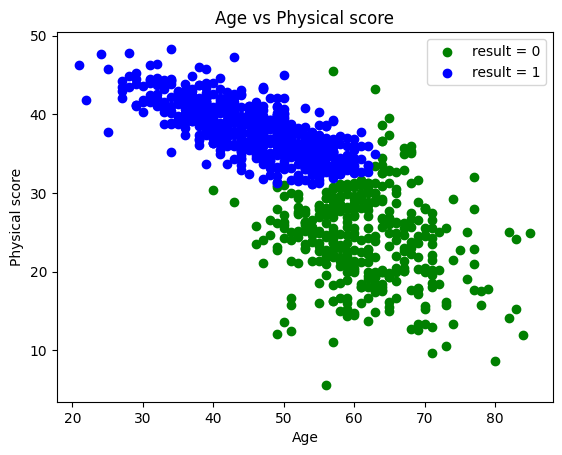

In [33]:
plt.scatter(x_test['age'][y_pred == 0] , x_test['physical_score'][y_pred == 0] , color = "green" , label = "result = 0")
plt.scatter(x_test['age'][y_pred == 1] , x_test['physical_score'][y_pred == 1] , color = "blue" , label = "result = 1")
plt.xlabel("Age")
plt.ylabel("Physical score")
plt.title("Age vs Physical score")
plt.legend()